## Draw plots needed for the paper

In [1]:
# Import required libraries
import pandas as pd
from plotUtils import PlotUtils
import numpy as np
import os
from pathlib import Path

In [2]:
datasetToName = {"ddg": "DuckDuckGo", "bing": "Bing", "google": "Google"}

## Plot utilities

In [3]:
TITLE_PAD = 30
TITLE_DIM = 30
XY_LABEL_PAD = 23
XY_LABEL_DIM = 21
XY_TICKS_DIM = 18
GRID_ALPHA = 0.2
FILL_ALPHA = 0.05
BAR_WIDTH = 0.5
LEGEND_LOC = "upper left"
LEGEND_LABEL_DIM = 15
COLOR_SCHEME = ["#91C483", "#FF6464", "#FFE162", "#C67ACE"]

FIG_SIZE = (18, 8)
FIG_BG_COLOR = None # "w"
FIG_DPI = 500
FIG_BBOX = "tight"
FIG_PAD = .3
FIG_FORMATS = ["png", "pdf"]

In [4]:
plotter = PlotUtils(
    options={
        "titlePad": TITLE_PAD,
        "titleDim": TITLE_DIM,
        "xyLabelPad": XY_LABEL_PAD,
        "xyLabelDim": XY_LABEL_DIM,
        "xyTicksDim": XY_TICKS_DIM,
        "gridAlpha": GRID_ALPHA,
        "fillAlpha": FILL_ALPHA,
        "barWidth": BAR_WIDTH,
        "legendLoc": LEGEND_LOC,
        "legendLabelDim": LEGEND_LABEL_DIM,
        "colorScheme": COLOR_SCHEME,
        "figSize": FIG_SIZE,
        "figBGColor": FIG_BG_COLOR,
        "figDPI": FIG_DPI,
        "figBBox": FIG_BBOX,
        "figPad": FIG_PAD,
        "figFormats": FIG_FORMATS,
    }
)

In [5]:
# Get absolute path
absPath = str(Path(os.path.abspath(os.getcwd())).absolute())
SPLIT_MEASURES_AVG_PATH = os.path.join(absPath, "SplitMeasuresAVG.csv")
SPLIT_MEASURES_ALL_PATH = os.path.join(absPath, "SplitMeasuresALL.csv")

#### Plots about transferabilty

In [6]:
avgResultDF = pd.read_csv(SPLIT_MEASURES_AVG_PATH)
avgResultDF 

,model,imbalance,bing_vs_bing,bing_vs_all,ddg_vs_ddg,ddg_vs_all,google_vs_google,google_vs_all
0,resnet,original,0.9704,0.9734,0.9733,0.9714,0.9504,0.9517
1,resnet,weak,0.9685,0.9688,0.9686,0.9711,0.9490,0.9479
2,resnet,medium,0.9699,0.9734,0.9706,0.9720,0.9488,0.9484
3,resnet,strong,0.9561,0.9588,0.9569,0.9576,0.9398,0.9376
4,alexnet,original,0.9489,0.9477,0.9528,0.9492,0.9810,0.9756
5,alexnet,weak,0.9453,0.9353,0.9454,0.9474,0.9767,0.9721
6,alexnet,medium,0.9403,0.9418,0.9480,0.9497,0.9767,0.9721
7,alexnet,strong,0.9272,0.9356,0.9459,0.9357,0.9543,0.9542
8,vgg,original,0.9791,0.9802,0.9830,0.9788,0.9854,0.9804
9,vgg,weak,0.9796,0.9795,0.9845,0.9814,0.9830,0.9803


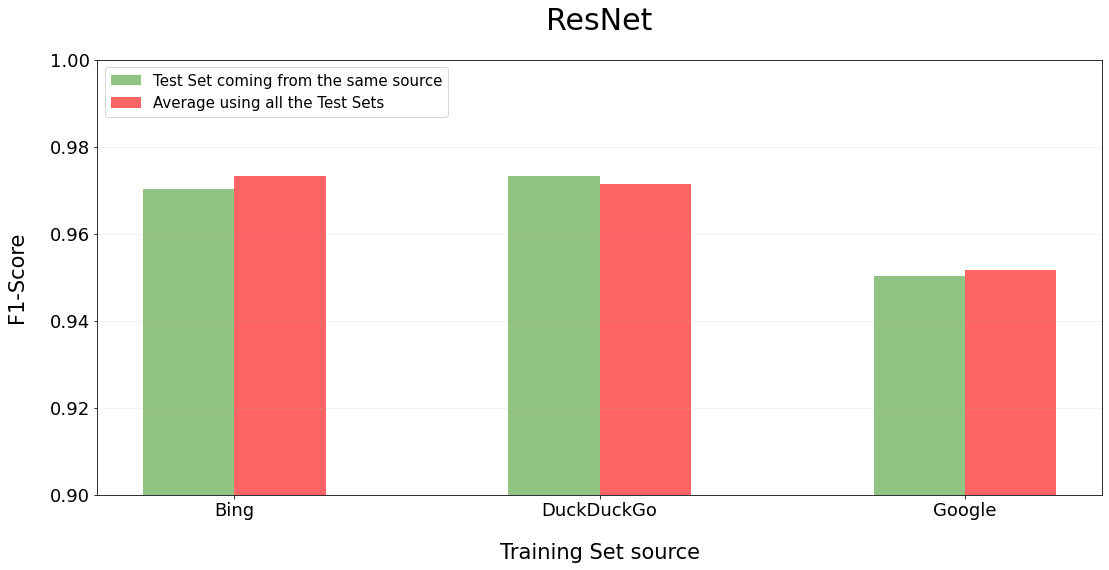

In [7]:
sameSource = [0.9704, 0.9733, 0.9504]
avgSources = [0.9734, 0.9714, 0.9517]

plotter.plotResults(
      x=np.arange(3),
      yArr=[list(sameSource), list(avgSources)],
      yLabel="F1-Score",
      xLabel="Training Set source",
      legend=["Test Set coming from the same source", "Average using all the Test Sets"],
      xTicks=list(['Bing', 'DuckDuckGo', 'Google']),
      showGrid=True,
      gridAxis="y",
      style="bar",
      saveTitle="ResNetAvg",
      yLim= [0.9,1],
      title="ResNet"
)

In [8]:
allResultDF = pd.read_csv(SPLIT_MEASURES_ALL_PATH)
allResultDF 

,Dataset used for Training,Model,Imbalance Level,Bing,DDG,Google
0,Bing,ResNet,Original,0.9704,0.9756,0.9743
1,Bing,ResNet,Weak,0.9685,0.9696,0.9682
2,Bing,ResNet,Medium,0.9699,0.9751,0.9751
3,Bing,ResNet,Strong,0.9561,0.9597,0.9606
4,Bing,AlexNet,Original,0.9489,0.9481,0.9460
5,Bing,AlexNet,Weak,0.9453,0.9315,0.9291
6,Bing,AlexNet,Medium,0.9403,0.9404,0.9448
7,Bing,AlexNet,Strong,0.9272,0.9398,0.9398
8,Bing,VGG,Original,0.9791,0.9814,0.9801
9,Bing,VGG,Weak,0.9796,0.9825,0.9766


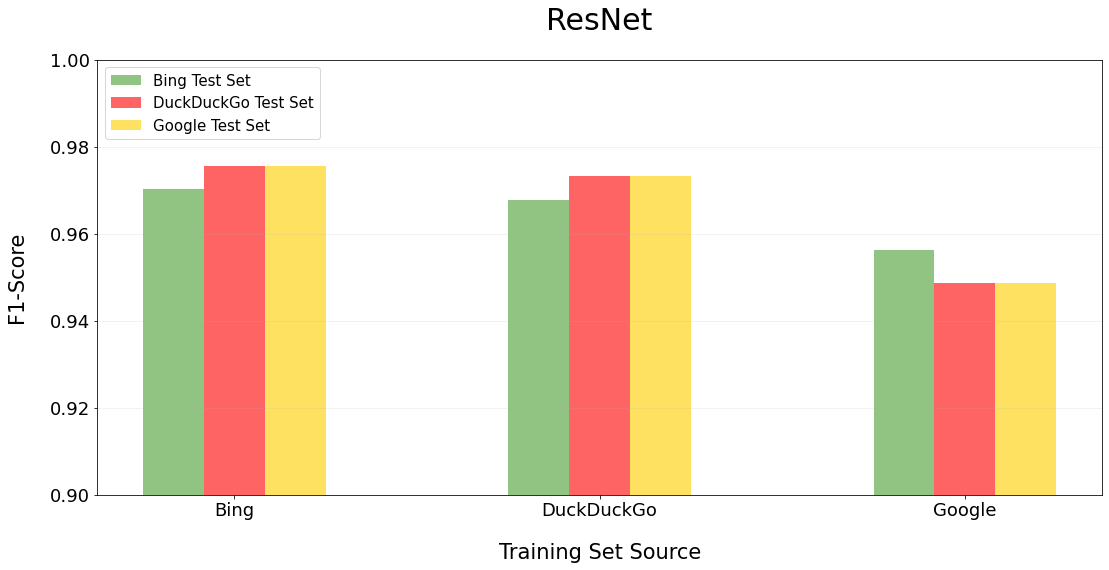

In [9]:
modelOffset = 0

bingTestSet =   [allResultDF.at[modelOffset,"Bing"]  ,allResultDF.at[12 + modelOffset,"Bing"]  ,allResultDF.at[24 + modelOffset,"Bing"]]
ddgTestSet =    [allResultDF.at[modelOffset,"DDG"]   ,allResultDF.at[12 + modelOffset,"DDG"]   ,allResultDF.at[24 + modelOffset,"DDG"]]
googleTestSet = [allResultDF.at[modelOffset,"Google"],allResultDF.at[12 + modelOffset,"Google"],allResultDF.at[24 + modelOffset,"Google"]]

plotter.plotResults(
      x=np.arange(3),
      yArr=[list(bingTestSet), list(ddgTestSet), list(ddgTestSet)],
      yLabel="F1-Score",
      xLabel="Training Set Source",
      legend=["Bing Test Set", "DuckDuckGo Test Set", "Google Test Set"],
      xTicks=list(['Bing', 'DuckDuckGo', 'Google']),
      showGrid=True,
      gridAxis="y",
      style="bar",
      saveTitle="ResNetAll",
      yLim= [0.90,1],
      title="ResNet"
      
)

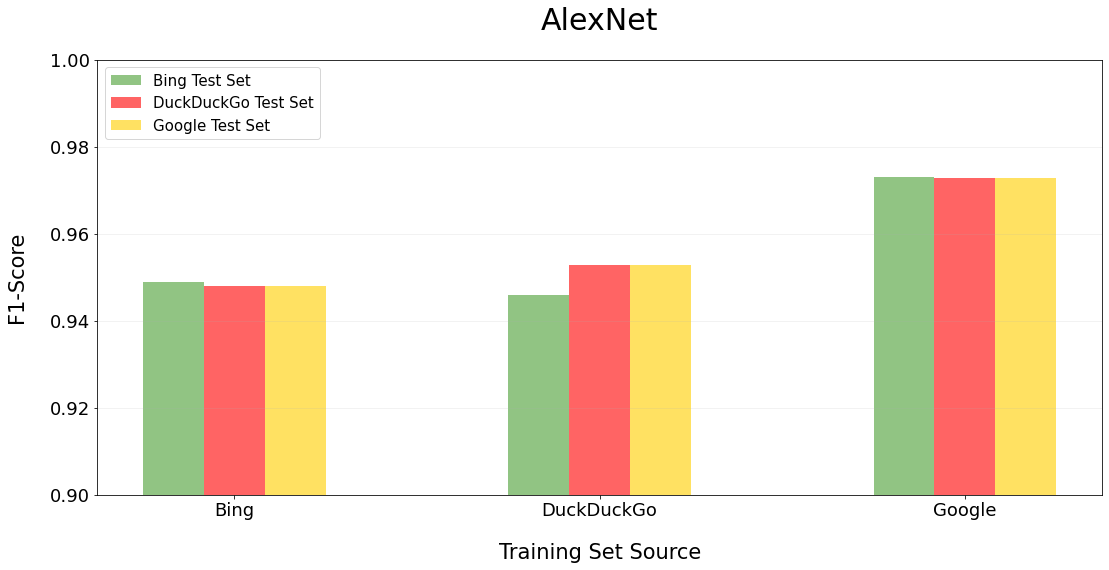

In [10]:
modelOffset = 4

bingTestSet =   [allResultDF.at[modelOffset,"Bing"]  ,allResultDF.at[12 + modelOffset,"Bing"]  ,allResultDF.at[24 + modelOffset,"Bing"]]
ddgTestSet =    [allResultDF.at[modelOffset,"DDG"]   ,allResultDF.at[12 + modelOffset,"DDG"]   ,allResultDF.at[24 + modelOffset,"DDG"]]
googleTestSet = [allResultDF.at[modelOffset,"Google"],allResultDF.at[12 + modelOffset,"Google"],allResultDF.at[24 + modelOffset,"Google"]]

plotter.plotResults(
      x=np.arange(3),
      yArr=[list(bingTestSet), list(ddgTestSet), list(ddgTestSet)],
      yLabel="F1-Score",
      xLabel="Training Set Source",
      legend=["Bing Test Set", "DuckDuckGo Test Set", "Google Test Set"],
      xTicks=list(['Bing', 'DuckDuckGo', 'Google']),
      showGrid=True,
      gridAxis="y",
      style="bar",
      saveTitle="AlexNetAll",
      yLim= [0.90,1],
      title="AlexNet"
)


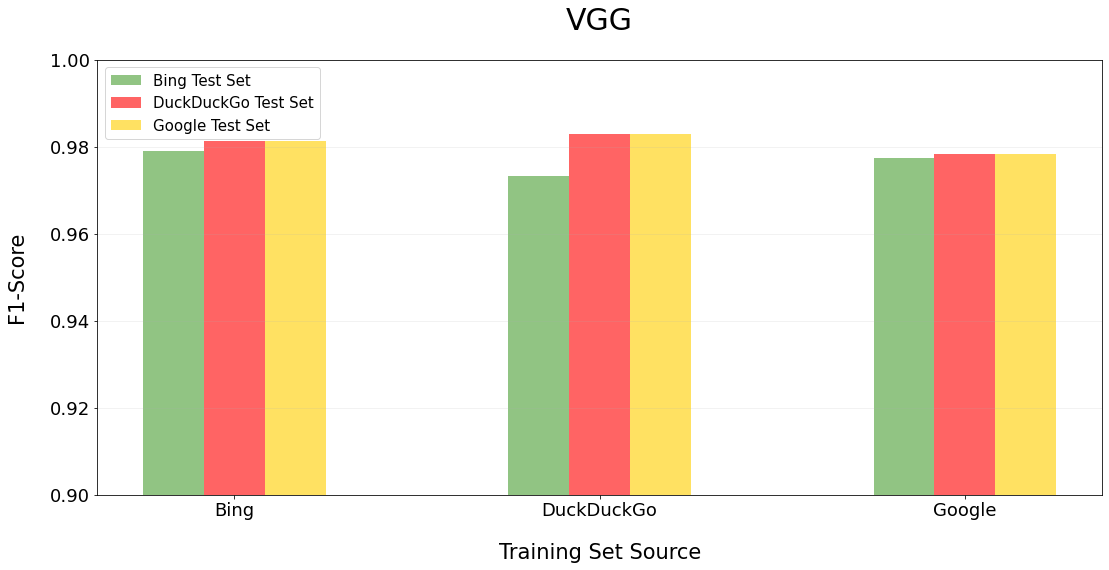

In [11]:
modelOffset = 8

bingTestSet =   [allResultDF.at[modelOffset,"Bing"]  ,allResultDF.at[12 + modelOffset,"Bing"]  ,allResultDF.at[24 + modelOffset,"Bing"]]
ddgTestSet =    [allResultDF.at[modelOffset,"DDG"]   ,allResultDF.at[12 + modelOffset,"DDG"]   ,allResultDF.at[24 + modelOffset,"DDG"]]
googleTestSet = [allResultDF.at[modelOffset,"Google"],allResultDF.at[12 + modelOffset,"Google"],allResultDF.at[24 + modelOffset,"Google"]]

plotter.plotResults(
      x=np.arange(3),
      yArr=[list(bingTestSet), list(ddgTestSet), list(ddgTestSet)],
      yLabel="F1-Score",
      xLabel="Training Set Source",
      legend=["Bing Test Set", "DuckDuckGo Test Set", "Google Test Set"],
      xTicks=list(['Bing', 'DuckDuckGo', 'Google']),
      showGrid=True,
      gridAxis="y",
      style="bar",
      saveTitle="vggAll",
      yLim= [0.90,1],
      title="VGG"
)

## RQ1

In [12]:
modelsEvaluationsDF = pd.read_csv("../results/modelsEvaluations.csv", sep=",", index_col=0)
modelsEvaluationsDF

,dataset,isMath,attack,advModel,advBalancing,model,modelDataset,balancing,acc,precision,recall,f1
0,bing,NaN,NaN,NaN,NaN,alexnet,bing,20/80,0.9230,0.879032,0.981,0.927221
1,bing,NaN,NaN,NaN,NaN,alexnet,bing,30/70,0.9400,0.928850,0.953,0.940770
2,bing,NaN,NaN,NaN,NaN,alexnet,bing,40/60,0.9455,0.957862,0.932,0.944754
3,bing,NaN,NaN,NaN,NaN,alexnet,bing,50/50,0.9485,0.941872,0.956,0.948883
4,bing,NaN,NaN,NaN,NaN,resnet,bing,20/80,0.9545,0.922791,0.992,0.956145
...,...,...,...,...,...,...,...,...,...,...,...,...
7447,google,True,FGSM,vgg,50/50,resnet,google,50/50,0.9800,0.980000,0.980,0.980000
7448,google,True,FGSM,vgg,50/50,vgg,google,20/80,0.9800,0.961538,1.000,0.980392
7449,google,True,FGSM,vgg,50/50,vgg,google,30/70,0.9850,0.970874,1.000,0.985222
7450,google,True,FGSM,vgg,50/50,vgg,google,40/60,0.9900,0.980392,1.000,0.990099


In [13]:
modelsEvaluationsDF = modelsEvaluationsDF.dropna(subset=["isMath"])
modelsEvaluationsDF


,dataset,isMath,attack,advModel,advBalancing,model,modelDataset,balancing,acc,precision,recall,f1
108,bing,False,BoxBlur,NaN,NaN,alexnet,bing,20/80,0.9325,0.917874,0.950,0.933661
109,bing,False,BoxBlur,NaN,NaN,alexnet,bing,30/70,0.9300,0.935223,0.924,0.929577
110,bing,False,BoxBlur,NaN,NaN,alexnet,bing,40/60,0.9390,0.963080,0.913,0.937372
111,bing,False,BoxBlur,NaN,NaN,alexnet,bing,50/50,0.9380,0.943320,0.932,0.937626
112,bing,False,BoxBlur,NaN,NaN,resnet,bing,20/80,0.9535,0.927427,0.984,0.954876
...,...,...,...,...,...,...,...,...,...,...,...,...
7447,google,True,FGSM,vgg,50/50,resnet,google,50/50,0.9800,0.980000,0.980,0.980000
7448,google,True,FGSM,vgg,50/50,vgg,google,20/80,0.9800,0.961538,1.000,0.980392
7449,google,True,FGSM,vgg,50/50,vgg,google,30/70,0.9850,0.970874,1.000,0.985222
7450,google,True,FGSM,vgg,50/50,vgg,google,40/60,0.9900,0.980392,1.000,0.990099


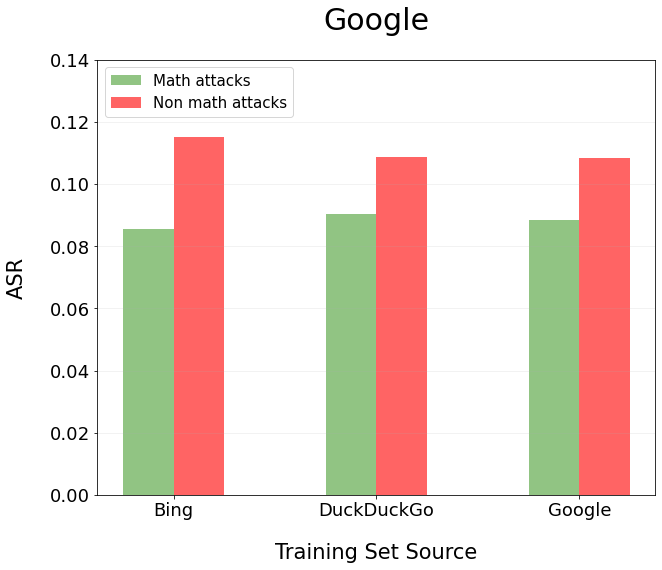

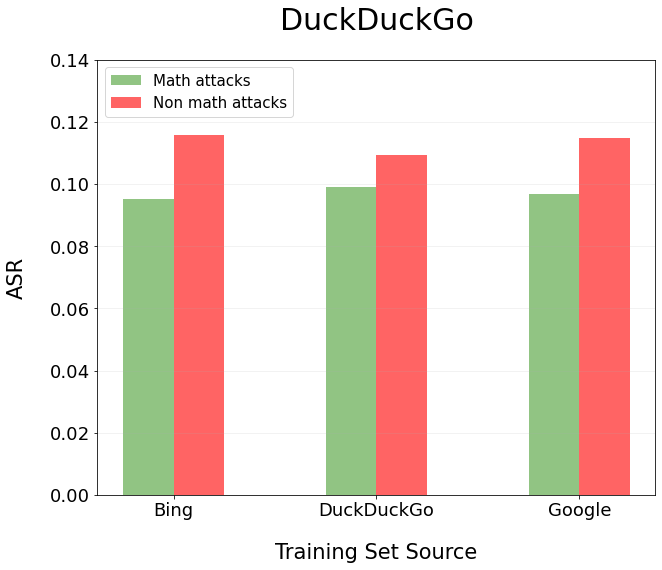

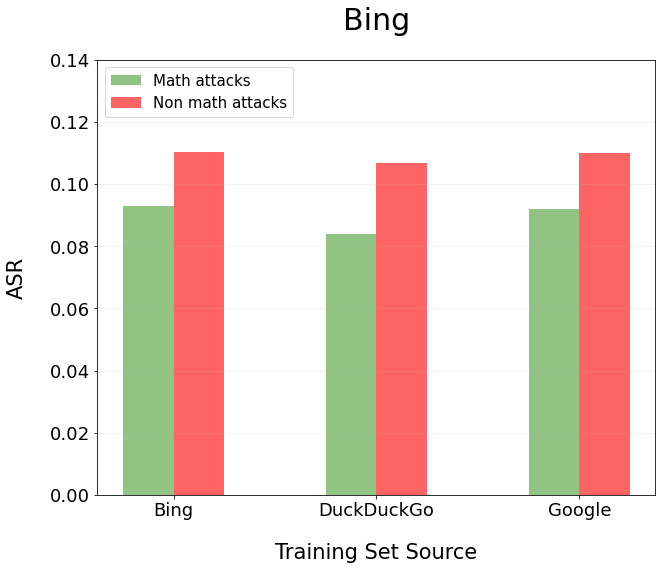

In [14]:
plotter.setOptions(
    {
        "barWidth": 0.5,
    }
)

for dataset in ["google", "ddg", "bing"]:
    datasetDF = modelsEvaluationsDF[modelsEvaluationsDF["dataset"] == dataset]
    mathDF = datasetDF[datasetDF["isMath"] == True]
    mathMeanDF = mathDF.groupby(["modelDataset"]).mean()

    nonMathDF = datasetDF[datasetDF["isMath"] == False]
    nonMathMeanDF = nonMathDF.groupby(["modelDataset"]).mean()

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(3),
        yArr=[list(1 - mathMeanDF["acc"]), list(1 - nonMathMeanDF["acc"])],
        yLabel="ASR",
        xLabel="Training Set Source",
        legend=["Math attacks", "Non math attacks"],
        xTicks=['Bing', 'DuckDuckGo', 'Google'],
        showGrid=True,
        gridAxis="y",
        style="bar",
        yLim=[0, 0.14],
        saveTitle="rq1_" + dataset,
        title=datasetToName[dataset]
    )

## RQ3

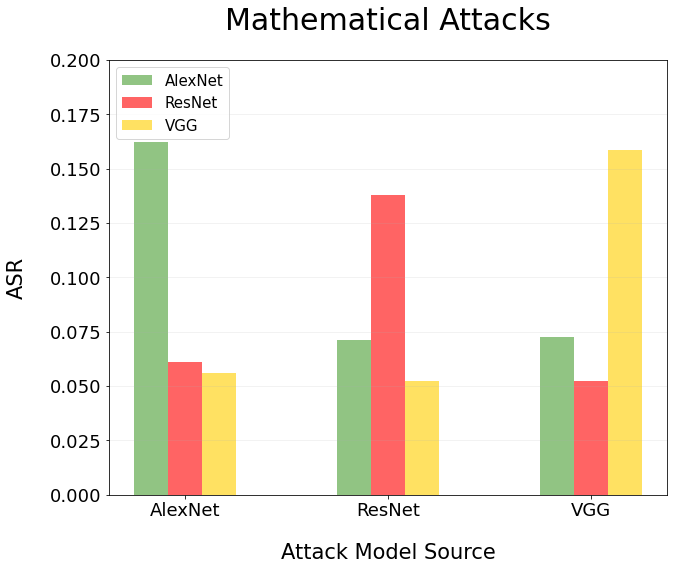

In [20]:
plotter.setOptions(
    {
        "barWidth": 0.5,
    }
)

for isMath in [True]:
    
    datasetDF = modelsEvaluationsDF[modelsEvaluationsDF["isMath"] == isMath]

    alexnetDF = datasetDF[datasetDF["model"] == "alexnet"]
    alexnetMeanDF = alexnetDF.groupby(["advModel"]).mean()

    resnetDF = datasetDF[datasetDF["model"] == "resnet"]
    resnetMeanDF = resnetDF.groupby(["advModel"]).mean()

    vggDF = datasetDF[datasetDF["model"] == "vgg"]
    vggMeanDF =vggDF.groupby(["advModel"]).mean()

    if isMath == True:
        graph_title = "Mathematical Attacks"
        file_title = "math"
    else:
        graph_title = "Non Mathematical Attacks"
        file_title = "nonmath"

    # alexnetDF = datasetDF[datasetDF["model"] == True]
    # mathMeanDF = mathDF.groupby(["advModel"]).mean()

    # nonMathDF = datasetDF[datasetDF["isMath"] == False]
    # nonMathMeanDF = nonMathDF.groupby(["modelDataset"]).mean()

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(3),
        yArr=[list(1 - alexnetMeanDF["acc"]), list(1 - resnetMeanDF["acc"]), list(1 - vggMeanDF["acc"])],
        yLabel="ASR",
        xLabel="Attack Model Source",
        legend=["AlexNet", "ResNet", "VGG"],
        xTicks=["AlexNet", "ResNet", "VGG"],
        showGrid=True,
        gridAxis="y",
        style="bar",
        yLim=[0, 0.2],
        saveTitle="rq3_" + file_title,
        title=graph_title
    )

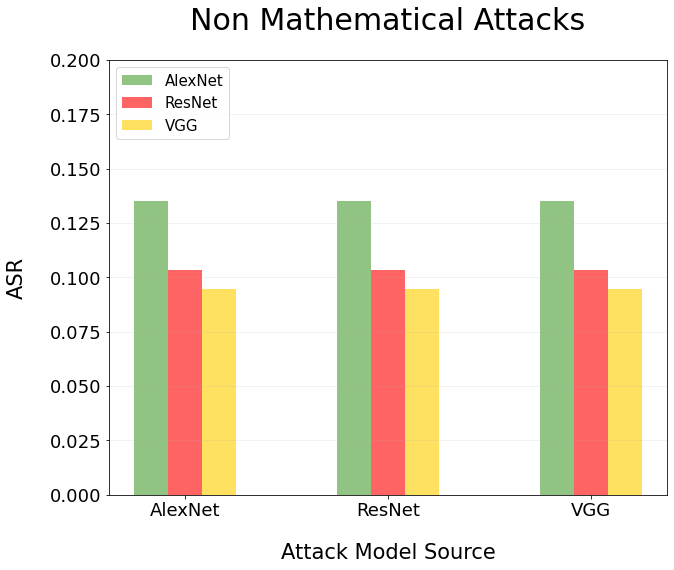

In [21]:
datasetDF = modelsEvaluationsDF[modelsEvaluationsDF["isMath"] == False]

alexnetDF = datasetDF[datasetDF["model"] == "alexnet"]
alexnetMeanDF = alexnetDF.groupby(["model"]).mean()

resnetDF = datasetDF[datasetDF["model"] == "resnet"]
resnetMeanDF = resnetDF.groupby(["model"]).mean()

vggDF = datasetDF[datasetDF["model"] == "vgg"]
vggMeanDF =vggDF.groupby(["model"]).mean()

graph_title = "Non Mathematical Attacks"
file_title = "nonmath"

# alexnetDF = datasetDF[datasetDF["model"] == True]
# mathMeanDF = mathDF.groupby(["advModel"]).mean()

# nonMathDF = datasetDF[datasetDF["isMath"] == False]
# nonMathMeanDF = nonMathDF.groupby(["modelDataset"]).mean()

plotter.plotResults(
    figSize=(10, 8),
    x=np.arange(3),
    yArr=[list(1 - alexnetMeanDF["acc"]), list(1 - resnetMeanDF["acc"]), list(1 - vggMeanDF["acc"])],
    yLabel="ASR",
    xLabel="Attack Model Source",
    legend=["AlexNet", "ResNet", "VGG"],
    xTicks=["AlexNet", "ResNet", "VGG"],
    showGrid=True,
    gridAxis="y",
    style="bar",
    yLim=[0, 0.2],
    saveTitle="rq3_" + file_title,
    title=graph_title
)